In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.loadtxt('/home/syedsaifhasan/Course/Machine Learning/Seminar/data.txt')
data = pd.DataFrame({'X1': data[:, 0], 'X2': data[:, 1], 'Label': data[:, 2]})
positive_data = data[data['Label']==1]
negative_data = data[data['Label']==0]

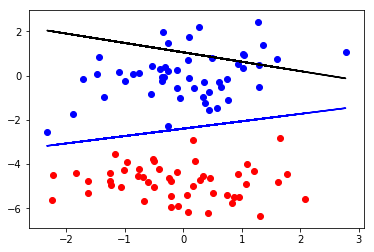

In [16]:
# Initialize theetas
def initialize_theetas(degree_theetas):
     return np.random.uniform(-0.01, 0.01, size=(degree_theetas+1))

# Return x matrix
def x_matrix(x_coordinates, degree):
    x = pd.DataFrame(np.ones(len(x_coordinates)))
    for column in enumerate(x_coordinates.columns):
        x[column[1]] =  x_coordinates[column[1]]
    return np.array(x)

# Predict the approximate value of y using given theetas
def pred_y(x_values, theeta_values):
    return (1/(1+np.exp(-np.dot(x_values, theeta_values))))

# Initialize variables
degree_func = 2
iterations = 5000
alpha = 0.001

# Initialize theetas
theetas = initialize_theetas(degree_func)

# Initialize x matrix
x_mat = x_matrix(data[['X1', 'X2']], degree_func)

# Predict Y val
y_val = pred_y(x_mat, theetas)

# Gradient Descent
def gradient_descent(alpha, theetas, predicted_y, y, x_mat, iterations):

    theetas = np.array(theetas)
    y = np.array(y)
    x_mat = np.array(x_mat)
    for a in range(iterations):
        for i in range(y.size):
            predicted_y = pred_y(x_mat[i], theetas)
            for b in range(x_mat.shape[1]):
                interval = (y[i] - predicted_y)*x_mat[i, b]
                theetas[b] = theetas[b] + alpha*interval

    return errors, theetas

# Calculate X2 using X1 and plot (X1, X2) BEFORE GRADIENT DESCENT
x2 = (theetas[0] + theetas[1]*data['X1'])*(-1/theetas[2])
plt.plot(data['X1'], x2, color='black')

# Update theetas
errors, theetas = gradient_descent(alpha, theetas, y_val, data['Label'], x_mat, iterations)

# Calculate X2 using X1 and plot (X1, X2) AFTER GRADIENT DESCENT
x2 = (theetas[0] + theetas[1]*data['X1'])*(-1/theetas[2])
plt.plot(data['X1'], x2, color='blue')

# Plot the dataset
plt.scatter(positive_data['X1'],positive_data['X2'], color='blue')
plt.scatter(negative_data['X1'],negative_data['X2'], color='red')

plt.show()